In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import tensorflow as tf  #pip install --ignore-installed --upgrade tensorflow "type this in anacoda prompt"
# if you get  error ModuleNotFoundError: No module named 'tensorflow'
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import models,layers


TensorFlow version: 2.11.0


In [23]:
BATCH_SIZE=15
WIDTH=3081
HIGHT=897
CHANNELS=3
EPOCHS=50
directory ="C:\\Users\\Favas\\DSC-25\DSC-T\\Internship\\RiceLeafDisease\\.ipynb_checkpoints\\RiceLeaf"


In [24]:
# image loading
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(WIDTH,HIGHT),
    batch_size=BATCH_SIZE
    
)

#NotFoundError: Could not find directory RiceLeaf
# Here instead of putting directory name it copy the path in to a variable and put that variable name
#SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape
# I put double back slash for this


Found 119 files belonging to 3 classes.


In [25]:
class_name=dataset.class_names
class_name

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

In [26]:
len(dataset)

8

In [27]:
for image_batch,label_batch in dataset.take(1):
    # print(image_batch[0]) # First image tensor
    #print(image_batch[0].numpy()) # using numpy
      print(image_batch[0].shape) # shape of the first image
#     print(image_batch.shape)  # shape of the batch
#     print(label_batch.numpy())

(3081, 897, 3)


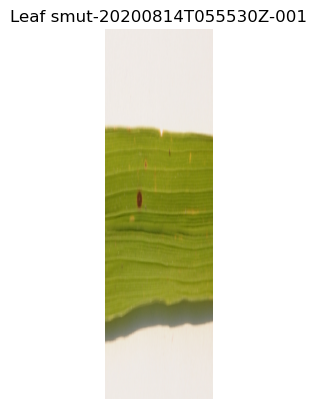

In [28]:
for image_batch,label_batch in dataset.take(1): # getting image
    plt.imshow(image_batch[1].numpy().astype("uint8")) # adding title name as class name
    plt.title(class_name[label_batch[5]])
    plt.axis('off')

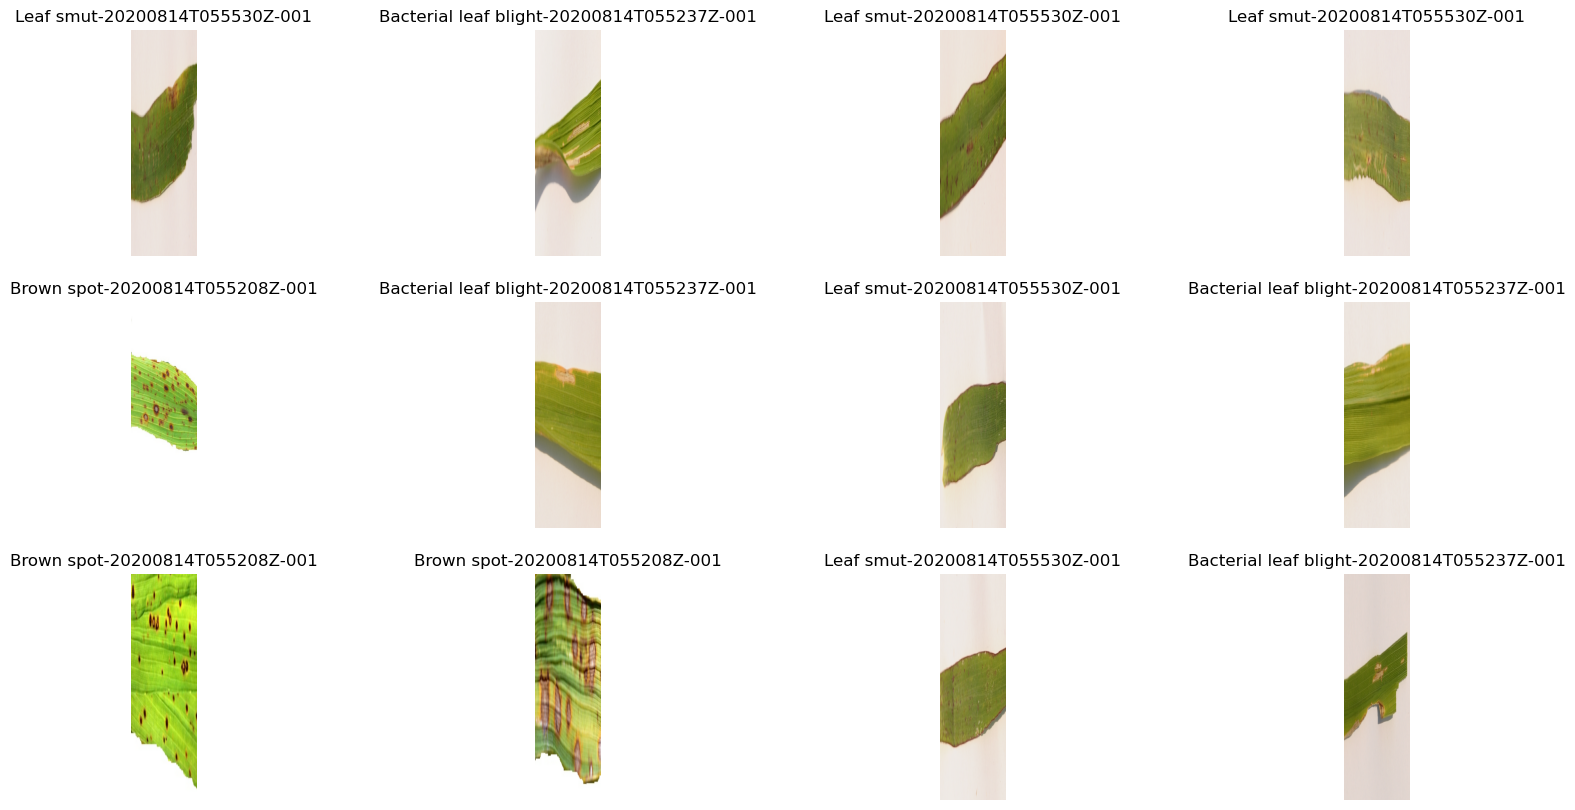

In [29]:
# To show 12 images
plt.figure(figsize=(20,10))
for image_batch,label_batch in dataset.take(1):
    for i in  range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

80% ==>training
20% ==>10% validation 10 % test

In [30]:
train_size=.80
len(dataset)*train_size

6.4

In [32]:
train_ds=dataset.take(6)

In [34]:
test_ds=dataset.skip(6)
len(test_ds)

2

In [35]:
val_size=0.1
len(dataset)*val_size

0.8

In [36]:
val_ds=test_ds.take(1)
len(val_ds)

1

In [37]:
pwd

'C:\\Users\\Favas\\DSC-25\\DSC-T\\Internship\\RiceLeafDisease'